<h1 align="center"><font color='Red'>Assignment for Data QA & QC Internship @ Datahut</font></h1>

#### Name: Rishana
#### Organization: Datahut
#### Date: 21.06.2024

#### <b><font color='brown'>IMPORTING MODULES:</font></b>

In [76]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [77]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### <b><font color='brown'>LOADING DATASET:</font></b>

In [78]:
#loading data
df=pd.read_csv('messy_data.csv')
df

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...,...
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


#### <b><font color='brown'>DATA EXPLORATION</font></b>

In [79]:
# To get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11000 non-null  int64  
 1   ID          11000 non-null  object 
 2   Name        8667 non-null   object 
 3   Age         9253 non-null   float64
 4   Email       9731 non-null   object 
 5   Join Date   8808 non-null   object 
 6   Salary      8761 non-null   float64
 7   Department  8745 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 687.6+ KB


In [80]:
df.shape

(11000, 8)

In [81]:
#To display the initial rows
df.head()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [82]:
#To display the final rows of the DataFrame
df.tail()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support
10999,7107,fc25a38a-5747-46eb-b6d3-7173f8255809,Caroline Ochoa,53.0,cdavis@hodges.com,2023-08-10,149224.000000,Support


In [83]:
#To display column labels of DataFrame
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Email', 'Join Date', 'Salary',
       'Department'],
      dtype='object')

In [84]:
# Display summary statistics to identify outliers and inconsistencies
print("\nStatistical analysis")
df.describe(include='all')


Statistical analysis


,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
count,11000.000000,11000,8667,9253.000000,9731,8808,8761.000000,8745
unique,NaN,10000,7929,NaN,9160,3338,NaN,264
top,NaN,0413800c-975f-4107-908c-f9f733496b3c,Elizabeth Williams,NaN,fwilliams@yahoo.com,2022-03-31,NaN,Support
freq,NaN,2,6,NaN,3,12,NaN,1425
mean,5012.947818,NaN,NaN,54.162650,NaN,NaN,89886.585012,NaN
std,2884.739158,NaN,NaN,21.072919,NaN,NaN,34896.320117,NaN
min,0.000000,NaN,NaN,18.000000,NaN,NaN,24655.136613,NaN
25%,2509.750000,NaN,NaN,36.000000,NaN,NaN,59723.844874,NaN
50%,5024.500000,NaN,NaN,54.000000,NaN,NaN,89241.000000,NaN
75%,7510.250000,NaN,NaN,72.000000,NaN,NaN,119491.000000,NaN


In [85]:
#unique value counts
for column in df.columns:
    unique_values_count = df[column].nunique()
    print(f"Unique values count for {column}: {unique_values_count}")

Unique values count for Unnamed: 0: 10000
Unique values count for ID: 10000
Unique values count for Name: 7929
Unique values count for Age: 73
Unique values count for Email: 9160
Unique values count for Join Date: 3338
Unique values count for Salary: 8122
Unique values count for Department: 264


In [86]:
# Display the unique values in each column to identify inconsistencies
unique_values = {col: df[col].unique() for col in df.columns}
print(unique_values)

{'Unnamed: 0': array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64), 'ID': array(['1e407ff9-6255-489d-a0de-34135d4f74bd',
       '379f55b8-87d5-4739-a146-7400b78c24d1',
       '18261368-dfa1-47f0-afc6-bddf45926b07', ...,
       '86a83f25-224d-498d-9901-c2e4a49ffbd2',
       '9cbba425-6af2-455f-8566-62402de79661',
       'ae6eee4d-ca8f-4932-96f1-487230875968'], dtype=object), 'Name': array(['Hunter Thomas', 'Jeremy Irwin', 'Jennifer Hammondquickly', ...,
       'Shelley Hopkinslive', 'Steven Armstrong', 'Stephanie Riossell'],
      dtype=object), 'Age': array([25., 90., 66., 39., 71., 81., 38., 44., 88., 23., 57., 60., 22.,
       nan, 30., 64., 36., 83., 84., 59., 87., 73., 18., 35., 40., 56.,
       72., 76., 86., 61., 34., 77., 20., 68., 69., 82., 79., 54., 62.,
       63., 45., 42., 49., 50., 74., 28., 33., 37., 58., 55., 70., 41.,
       80., 29., 21., 32., 46., 51., 31., 26., 85., 24., 52., 53., 75.,
       47., 19., 43., 48., 89., 78., 67., 65., 27.]), 'Email': array(['x

In [87]:
df['Name'].unique()

array(['Hunter Thomas', 'Jeremy Irwin', 'Jennifer Hammondquickly', ...,
       'Shelley Hopkinslive', 'Steven Armstrong', 'Stephanie Riossell'],
      dtype=object)

#### <b><font color='brown'>DATA PREPROCESSING</font></b>

In [88]:
# Dropping the unnecessary 'Unnamed: 0' and 'ID' column
# Reason: These column not needed for analysis.
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

In [89]:
#Checking is there any null value
df.isnull().sum()

Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64

Most column contains null values

In [90]:
# Fill missing numerical values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Salary'].fillna(df['Salary'].median(), inplace=True)

# For 'Department', fill missing values with 'Unknown'
df['Department'] = df['Department'].fillna('Unknown')


# Calculate the mode of the 'Join Date' column
mode_join_date = df['Join Date'].mode()[0]

# Replace missing values in 'Join Date' with the mode
df['Join Date'].fillna(mode_join_date, inplace=True)

# Convert 'Join Date' column to datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce').fillna(pd.to_datetime(mode_join_date))

In [91]:
# Dropping Duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,Name,Age,Email,Join Date,Salary,Department
0,Hunter Thomas,25.0,xlopez@hotmail.com,2022-03-31,88552.000000,Sales
1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,Unknown
2,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,Julia Lee,71.0,figueroakayla@yahoo.com,2022-03-31,143456.000000,Marketing
...,...,...,...,...,...,...
9605,Shelley Hopkinslive,79.0,Michael Walker,2022-03-31,47809.000000,HR
9606,Karen Wells,29.0,cheryllewis@hotmail.com,2022-03-31,147555.000000,Engineering
9607,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,89241.000000,Sales
9608,Stephanie Riossell,54.0,robert96@pollard-frye.com,2022-03-31,122609.594149,HR


In [92]:
# Assumption: Valid emails contain "@" and a domain. Invalid emails will be corrected if possible.
def correct_email(email):
    if pd.isna(email):
        return email
    if not re.match(r'.+@.+\..+', email):
        parts = email.split('@')
        if len(parts) == 1:
            return parts[0] + "@example.com"
        elif len(parts) == 2:
            if '.' not in parts[1]:
                return parts[0] + "@" + parts[1] + ".com"
    return email

df['Email'] = df['Email'].apply(correct_email)

In [93]:
df['Email'].unique()

array(['xlopez@hotmail.com', 'Jillian Jenkins@example.com',
       'jscottgreen.biz@example.com', ..., 'weavermary@yahoo.com',
       'kingcharles@hotmail.com', 'molly89gmail.com@example.com'],
      dtype=object)

In [94]:
#filtering professional emails

#function to check for professional email formats
def is_professional_email(email):
    if pd.isna(email):
        return False
    # Match email against the professional domains
    return bool(re.match(r'.+@.+\.(com|org|net|biz|info)$', email))

# Filter the dataframe to retain only rows with professional emails
df = df[df['Email'].apply(is_professional_email)]

In [95]:
# Define a function to clean the 'Name' column

#Clean the Name column

# Assumption: Names should only contain alphabetic characters and spaces.Remove non-alphabetic characters at the end of the name and ensure proper capitalization.

def clean_name(name):
    if pd.isna(name):
        return name
    # Remove non-alphabetic characters from the end of the name
    name = re.sub(r'[^a-zA-Z\s]+$', '', name)
    # Ensure proper capitalization
    name = name.title()
    return name

# Apply the clean_name function to the 'Name' column
df['Name'] = df['Name'].astype(str).apply(clean_name)

In [96]:
df['Name'].unique()

array(['Hunter Thomas', 'Jeremy Irwin', 'Jennifer Hammondquickly', ...,
       'Shelley Hopkinslive', 'Steven Armstrong', 'Stephanie Riossell'],
      dtype=object)

In [97]:
#Standardize the Join Date column
# Assumption: Dates should follow the format YYYY-MM-DD.
df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')
df['Join Date'] = df['Join Date'].dt.strftime('%Y-%m-%d')

In [98]:
df['Join Date'].unique()

array(['2022-03-31', '2022-07-07', '2023-11-21', ..., '2022-02-26',
       '2022-09-21', '2022-01-29'], dtype=object)

In [99]:
#  Standardize Department Names
# Assumption: Known department name variations and typos are mapped to standard names.

# Define a function to correct department names using regex
def correct_department_name(department):
    # Define regex patterns
    patterns = {
        'Sales': r'^Sales[a-zA-Z]*$',
        'Support': r'^Support[a-zA-Z]*$',
        'Engineering': r'^Engineering[a-zA-Z]*$',
        'Marketing': r'^Marketing[a-zA-Z]*$',
        'HR': r'^HR[a-zA-Z]*$',
        'Unknown': r'^Unknown$'  # Exact match for 'Unknown'
    }
    
    # Check if department is 'Unknown'
    if department == 'Unknown':
        return department
    
    # Iterate through patterns to find correct category
    for category, pattern in patterns.items():
        if re.match(pattern, department):
            return category
    
    # If no match found, remove the last character and retry
    while department:
        department = department[:-1]  # Remove the last character
        for category, pattern in patterns.items():
            if re.match(pattern, department):
                return category
    
    # If no match found after all attempts, return the original department name
    return department

# Apply the correction function to the 'Department' column
df['Department'] = df['Department'].apply(correct_department_name)

# Display unique values in the 'Department' column after correction
print(df['Department'].unique())

['Sales' 'Unknown' 'Engineering' 'Support' 'Marketing' 'HR']


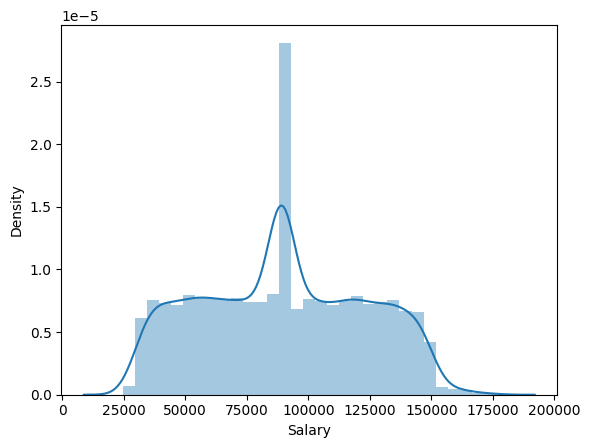

In [100]:
#outlier detection
sns.distplot(df['Salary'])
plt.show()

In [101]:
# Identify outliers in 'Salary' using IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lw = Q1 - 1.5 * IQR
uw = Q3 + 1.5 * IQR

#capping 'salary' column
df['Salary'] = np.where(df['Salary'] < lw, lw, df['Salary'])
df['Salary'] = np.where(df['Salary'] > uw, uw, df['Salary'])

In [102]:
#save the cleaned dataset as `cleaned_dataset.csv`.
cleaned_file_path = 'cleaned_dataset.csv'
df.to_csv(cleaned_file_path, index=False)

In [103]:
df

,Name,Age,Email,Join Date,Salary,Department
0,Hunter Thomas,25.0,xlopez@hotmail.com,2022-03-31,88552.000000,Sales
1,Jeremy Irwin,90.0,Jillian Jenkins@example.com,2022-07-07,139227.000000,Unknown
2,Jennifer Hammondquickly,66.0,jscottgreen.biz@example.com,2023-11-21,65550.000000,Engineering
3,Sydney Taylorso,39.0,luke56gonzalez.com@example.com,2021-11-05,139932.000000,Support
4,Julia Lee,71.0,figueroakayla@yahoo.com,2022-03-31,143456.000000,Marketing
...,...,...,...,...,...,...
9605,Shelley Hopkinslive,79.0,Michael Walker@example.com,2022-03-31,47809.000000,HR
9606,Karen Wells,29.0,cheryllewis@hotmail.com,2022-03-31,147555.000000,Engineering
9607,Steven Armstrong,38.0,molly89gmail.com@example.com,2021-06-24,89241.000000,Sales
9608,Stephanie Riossell,54.0,robert96@pollard-frye.com,2022-03-31,122609.594149,HR


In [104]:
df.isnull().sum()

Name          0
Age           0
Email         0
Join Date     0
Salary        0
Department    0
dtype: int64